## Описание датасета: Global Earthquake and Tsunami Risk Assessment

### Предметная область и данные
*   **Предметная область:** Сейсмология, оценка природных рисков, прогнозирование цунами, системы раннего оповещения.
*   **Источник данных:** https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset - - агрегация данных сейсмического мониторинга за 2001-2022 годы.
*   **Характер данных:** Реальные данные о 782 значительных землетрясениях по всему миру.

### Атрибуты датасета
В датасете представлены следующие ключевые атрибуты:
| Название атрибута | Тип данных | Описание | Диапазон значений |
| :--- | :--- | :--- | :--- |
| `magnitude` | Числовой (float) | Магнитуда землетрясения по шкале Рихтера | 6.5 - 9.1 |
| `cdi` | Числовой (int) | Интенсивность, ощущаемая населением | 0 - 9 |
| `mmi` | Числовой (int) | Инструментальная интенсивность по шкале Меркалли | 1 - 9 |
| `sig` | Числовой (int) | Оценка значимости события | 650 - 2910 |
| `nst` | Числовой (int) | Количество станций сейсмического мониторинга | 0 - 934 |
| `dmin` | Числовой (float) | Расстояние до ближайшей сейсмической станции (градусы) | 0.0 - 17.7 |
| `gap` | Числовой (float) | Азимутальный зазор между станциями (градусы) | 0.0 - 239.0 |
| `depth` | Числовой (float) | Глубина очага землетрясения (км) | 2.7 - 670.8 |
| `latitude` | Числовой (float) | Широта эпицентра (WGS84) | -61.85° до 71.63° |
| `longitude` | Числовой (float) | Долгота эпицентра (WGS84) | -179.97° до 179.66° |
| `year` | Числовой (int) | Год возникновения землетрясения | 2001 - 2022 |
| `month` | Числовой (int) | Месяц возникновения | 1 - 12 |
| `tsunami` | Бинарный (int) | **Целевая переменная**: индикатор потенциала цунами | 0 (нет), 1 (да) |


### Постановка задачи анализа
**Основная задача:** Бинарная классификация для прогнозирования потенциала возникновения цунами на основе сейсмических параметров землетрясения.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("earthquake_data_tsunami.csv")

df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [8]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


## Среднее значение атрибута и СКО

In [6]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

descriptive_stats = df[numeric_columns].agg(['mean', 'std']).transpose()
descriptive_stats.columns = ['Среднее значение', 'СКО']
print(descriptive_stats)

           Среднее значение         СКО
magnitude          6.941125    0.445514
cdi                4.333760    3.169939
mmi                5.964194    1.462724
sig              870.108696  322.465367
nst              230.250639  250.188177
dmin               1.325757    2.218805
gap               25.038990   24.225067
depth             75.883199  137.277078
latitude           3.538100   27.303429
longitude         52.609199  117.898886
Year            2012.280051    6.099439
Month              6.563939    3.507866
tsunami            0.388747    0.487778


## Гистограммы распределения значений

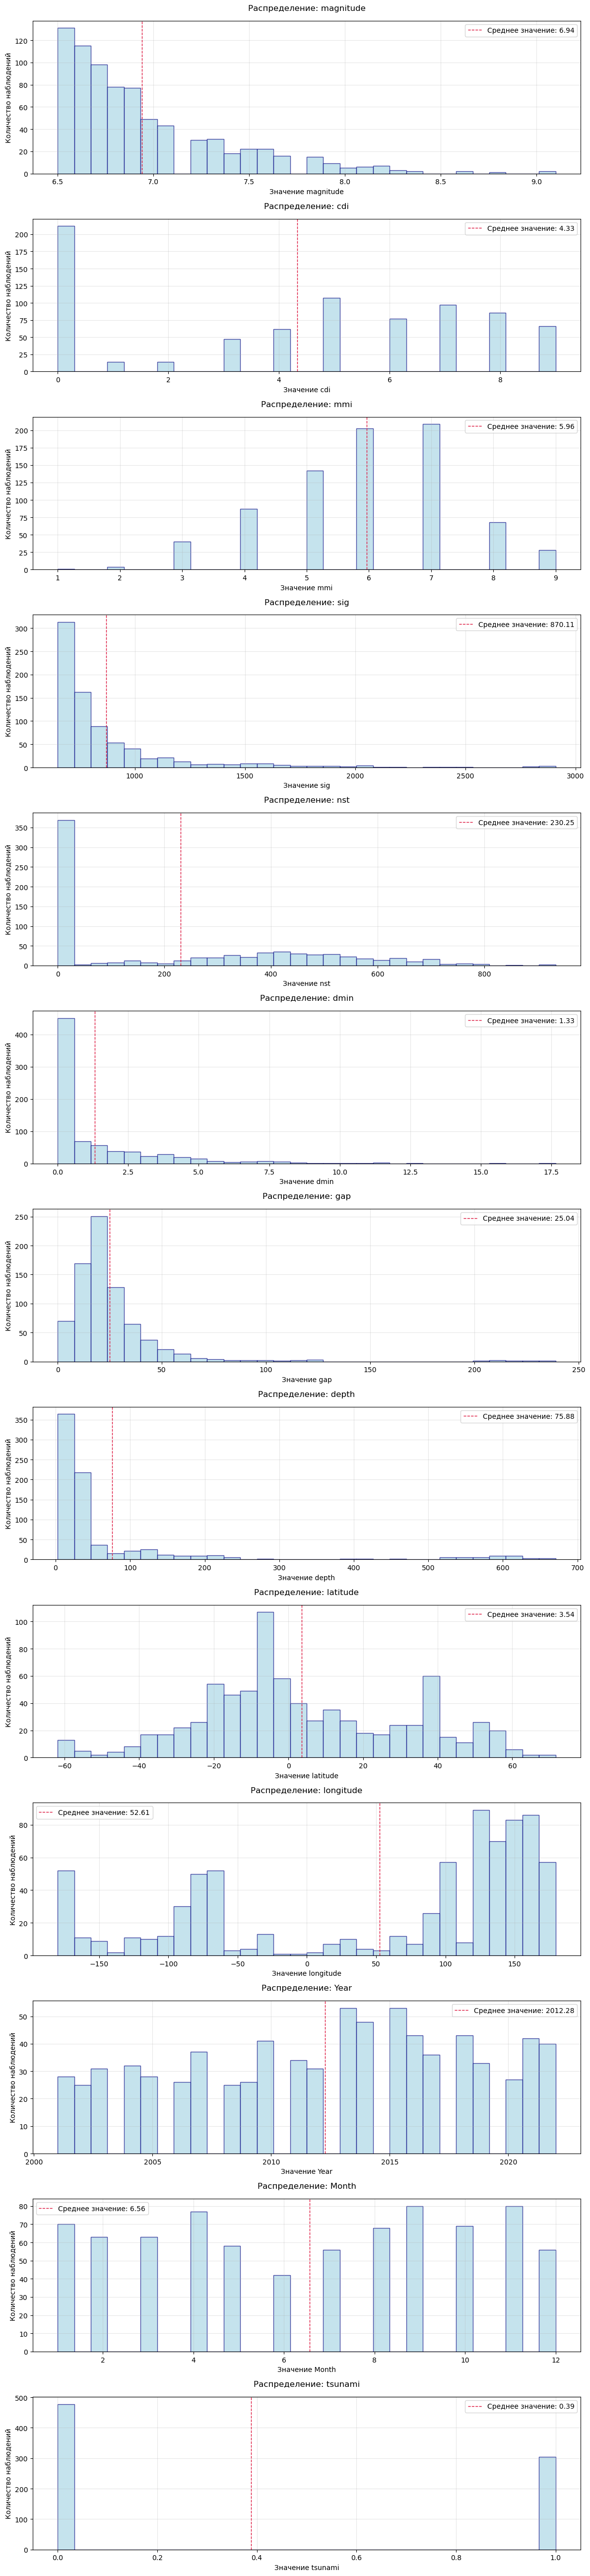

In [34]:
figure, axes_grid = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 4*len(numeric_columns)))

for index, column_name in enumerate(numeric_columns):
    current_ax = axes_grid[index]
    
    current_ax.hist(
        df[column_name], 
        bins=30,
        color='lightblue',
        edgecolor='navy',
        alpha=0.7,
        density=False
    )
    mean_value = df[column_name].mean()
    current_ax.axvline(
        mean_value, 
        color='crimson', 
        linestyle='--', 
        linewidth=1, 
        label=f'Среднее значение: {mean_value:.2f}'
    )
    current_ax.set_title(f'Распределение: {column_name}', pad=15)
    current_ax.set_ylabel('Количество наблюдений')
    current_ax.set_xlabel(f'Значение {column_name}')
    current_ax.legend()
    current_ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Анализ выбросов

In [71]:
numerical_dataset = df.select_dtypes(include=[np.number])
outliers_summary = []

for feature_name in numerical_dataset.columns:

    first_quartile = numerical_dataset[feature_name].quantile(0.25)
    third_quartile = numerical_dataset[feature_name].quantile(0.75)
    interquartile_range = third_quartile - first_quartile
    
    outlier_lower_bound = first_quartile - 1.5 * interquartile_range
    outlier_upper_bound = third_quartile + 1.5 * interquartile_range
    
    outlier_mask = (numerical_dataset[feature_name] < outlier_lower_bound) | (numerical_dataset[feature_name] > outlier_upper_bound)
    outlier_count = outlier_mask.sum()
    
    outliers_summary.append({
        'Атрибут': feature_name,
        'Всего наблюдений': len(numerical_dataset),
        'Количество выбросов': outlier_count,
        'Доля выбросов_%': f"{(outlier_count / len(numerical_dataset) * 100):.2f}",
        'Нижняя граница': f"{outlier_lower_bound:.2f}",
        'Верхняя граница': f"{outlier_upper_bound:.2f}",
        'Межквартильный размах': f"{interquartile_range:.2f}"
    })

outliers_report = pd.DataFrame(outliers_summary)
outliers_report

,Атрибут,Всего наблюдений,Количество выбросов,Доля выбросов_%,Нижняя граница,Верхняя граница,Межквартильный размах
0,magnitude,782,37,4.73,5.85,7.85,0.50
1,cdi,782,0,0.00,-10.50,17.50,7.00
2,mmi,782,1,0.13,2.00,10.00,2.00
3,sig,782,73,9.34,362.88,1237.88,218.75
4,nst,782,0,0.00,-667.50,1112.50,445.00
5,dmin,782,61,7.80,-2.79,4.66,1.86
6,gap,782,48,6.14,-8.44,53.06,15.38
7,depth,782,139,17.77,-39.62,103.38,35.75
8,latitude,782,0,0.00,-73.47,83.53,39.25
9,longitude,782,0,0.00,-402.58,479.85,220.61


## Проверка на пропущенные значения

In [38]:
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

Количество пропущенных значений в каждом столбце:
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


**Пропущенных значений нет, обрабатывать нечего**

## Опредение корреляции между параметрами

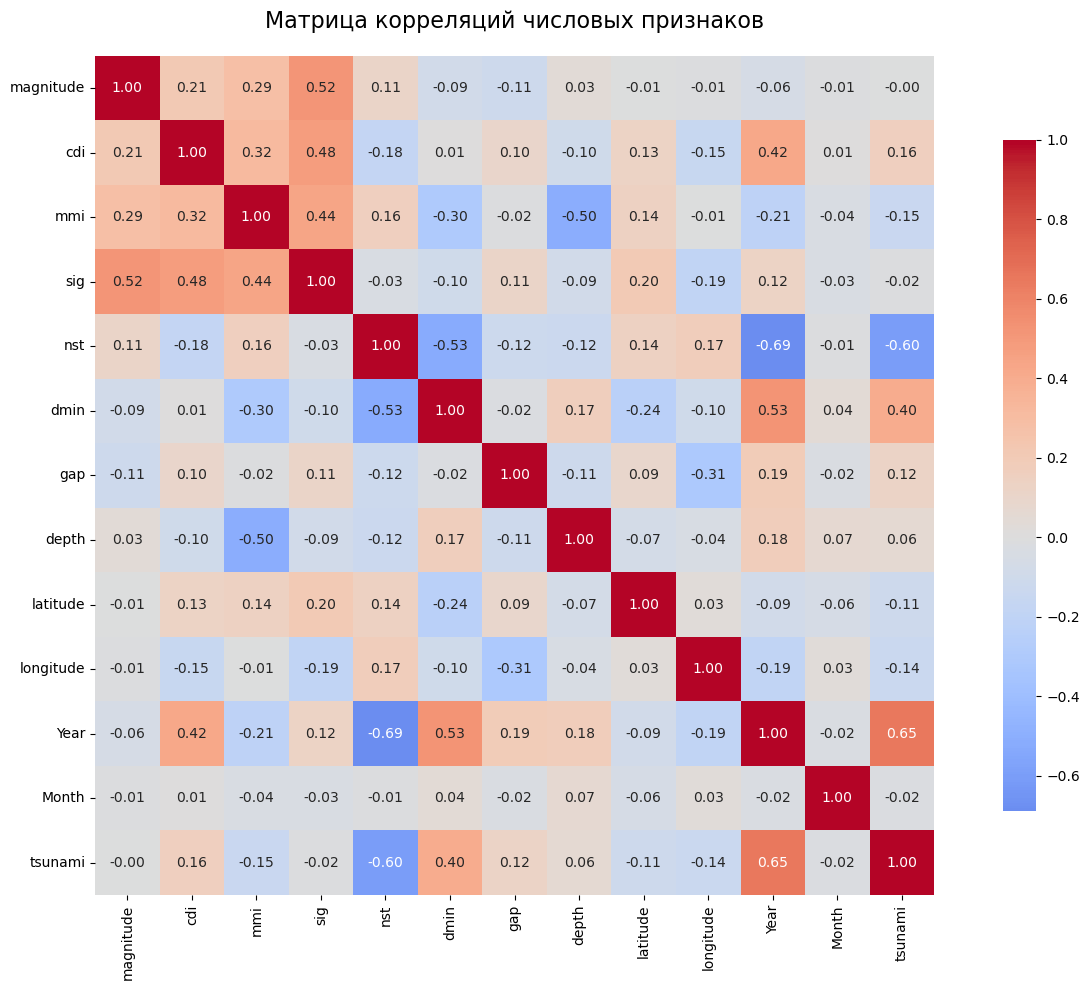

In [59]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций числовых признаков', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Анализ корреляций между признаками

In [75]:
print("=" * 35)
print("АНАЛИЗ КОРРЕЛЯЦИЙ МЕЖДУ ПРИЗНАКАМИ")
print("=" * 35)

print("\n1. Сильная корреляция (|r| >= 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.7:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            strong_correlations.append((col1, col2, corr_value))
            correlation_type = "положительная" if corr_value > 0 else "отрицательная"
            print(f"   {col1} ↔ {col2}: {corr_value:.3f} ({correlation_type})")

print("\n2. Средняя корреляция (0.5 <= |r| < 0.7):")
medium_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 <= abs(corr_value) < 0.7:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            medium_correlations.append((col1, col2, corr_value))
            correlation_type = "положительная" if corr_value > 0 else "отрицательная"
            print(f"   {col1} ↔ {col2}: {corr_value:.3f} ({correlation_type})")

print("\n3. Умеренная корреляция (0.3 <= |r| < 0.5):")
moderate_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.3 <= abs(corr_value) < 0.5:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            moderate_correlations.append((col1, col2, corr_value))
            correlation_type = "положительная" if corr_value > 0 else "отрицательная"
            print(f"   {col1} ↔ {col2}: {corr_value:.3f} ({correlation_type})")

print("\n4. Слабая корреляция (0.1 <= |r| < 0.3):")
weak_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.1 <= abs(corr_value) < 0.3:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            weak_correlations.append((col1, col2, corr_value))
            correlation_type = "положительная" if corr_value > 0 else "отрицательная"
            print(f"   {col1} ↔ {col2}: {corr_value:.3f} ({correlation_type})")
            

print("\n5. Не имеют корреляции (|r| < 0.1):")
null_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) < 0.1:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            null_correlations.append((col1, col2, corr_value))
            print(f"   {col1} ↔ {col2}: {corr_value:.3f}")

АНАЛИЗ КОРРЕЛЯЦИЙ МЕЖДУ ПРИЗНАКАМИ

1. Сильная корреляция (|r| >= 0.7):

2. Средняя корреляция (0.5 <= |r| < 0.7):
   magnitude ↔ sig: 0.516 (положительная)
   mmi ↔ depth: -0.504 (отрицательная)
   nst ↔ dmin: -0.529 (отрицательная)
   nst ↔ Year: -0.689 (отрицательная)
   nst ↔ tsunami: -0.600 (отрицательная)
   dmin ↔ Year: 0.529 (положительная)
   Year ↔ tsunami: 0.647 (положительная)

3. Умеренная корреляция (0.3 <= |r| < 0.5):
   cdi ↔ mmi: 0.318 (положительная)
   cdi ↔ sig: 0.480 (положительная)
   cdi ↔ Year: 0.423 (положительная)
   mmi ↔ sig: 0.442 (положительная)
   dmin ↔ tsunami: 0.401 (положительная)
   gap ↔ longitude: -0.314 (отрицательная)

4. Слабая корреляция (0.1 <= |r| < 0.3):
   magnitude ↔ cdi: 0.210 (положительная)
   magnitude ↔ mmi: 0.286 (положительная)
   magnitude ↔ nst: 0.113 (положительная)
   magnitude ↔ gap: -0.111 (отрицательная)
   cdi ↔ nst: -0.175 (отрицательная)
   cdi ↔ latitude: 0.129 (положительная)
   cdi ↔ longitude: -0.149 (отрицательная)
  

## Графики рассеивания

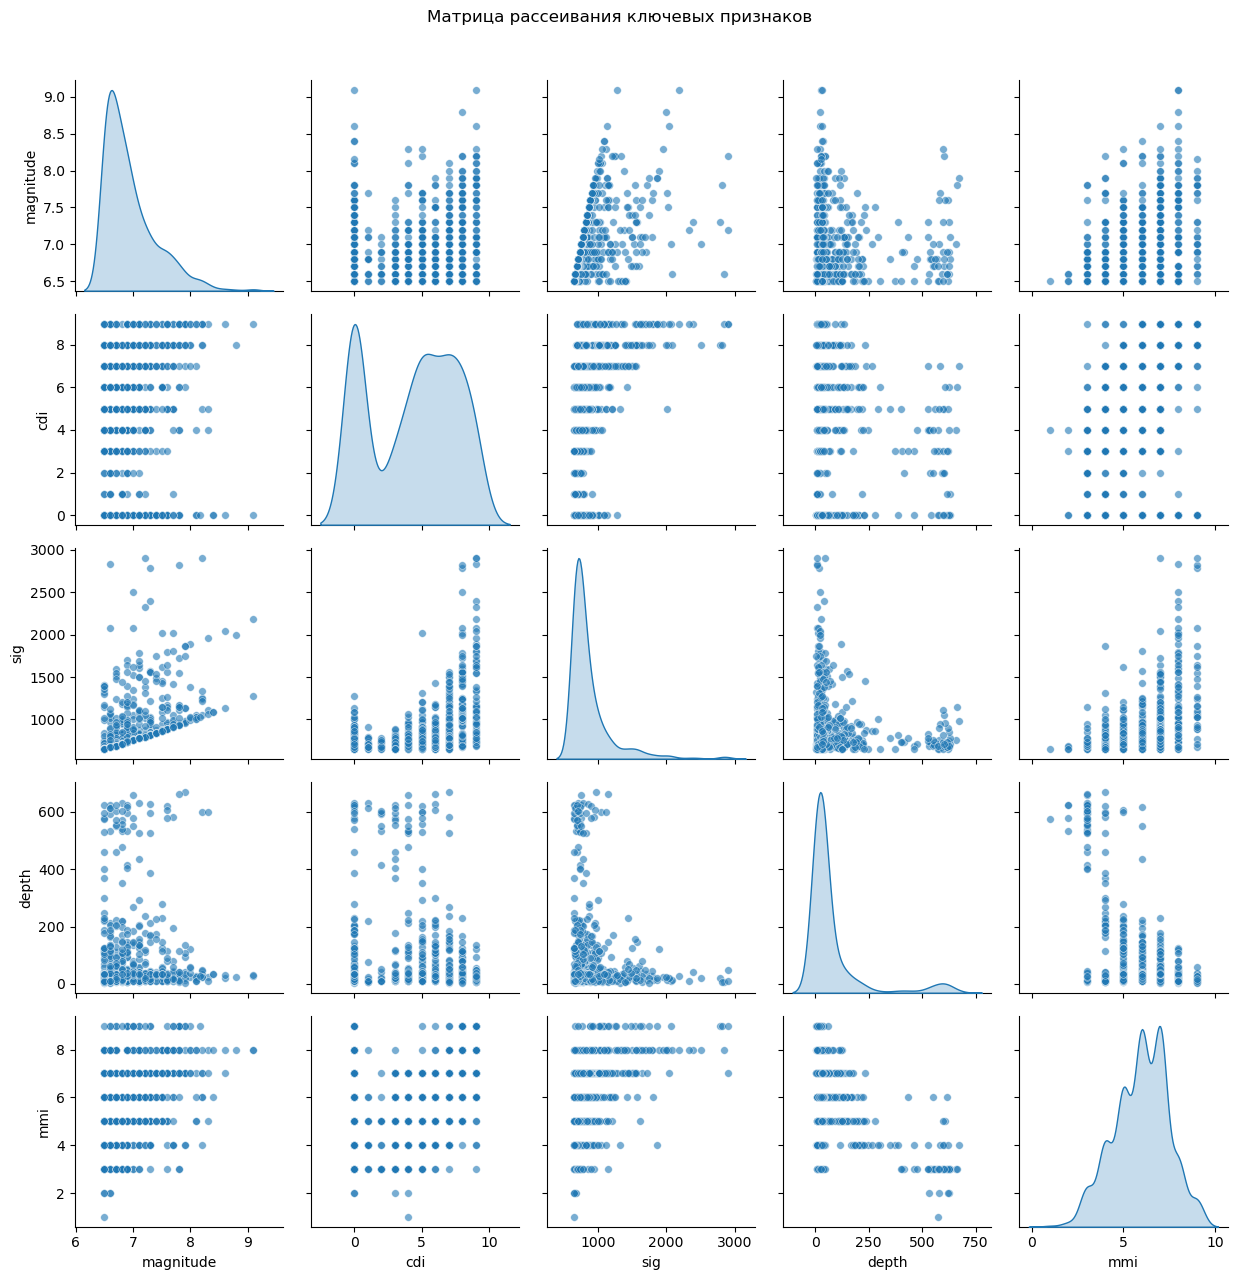

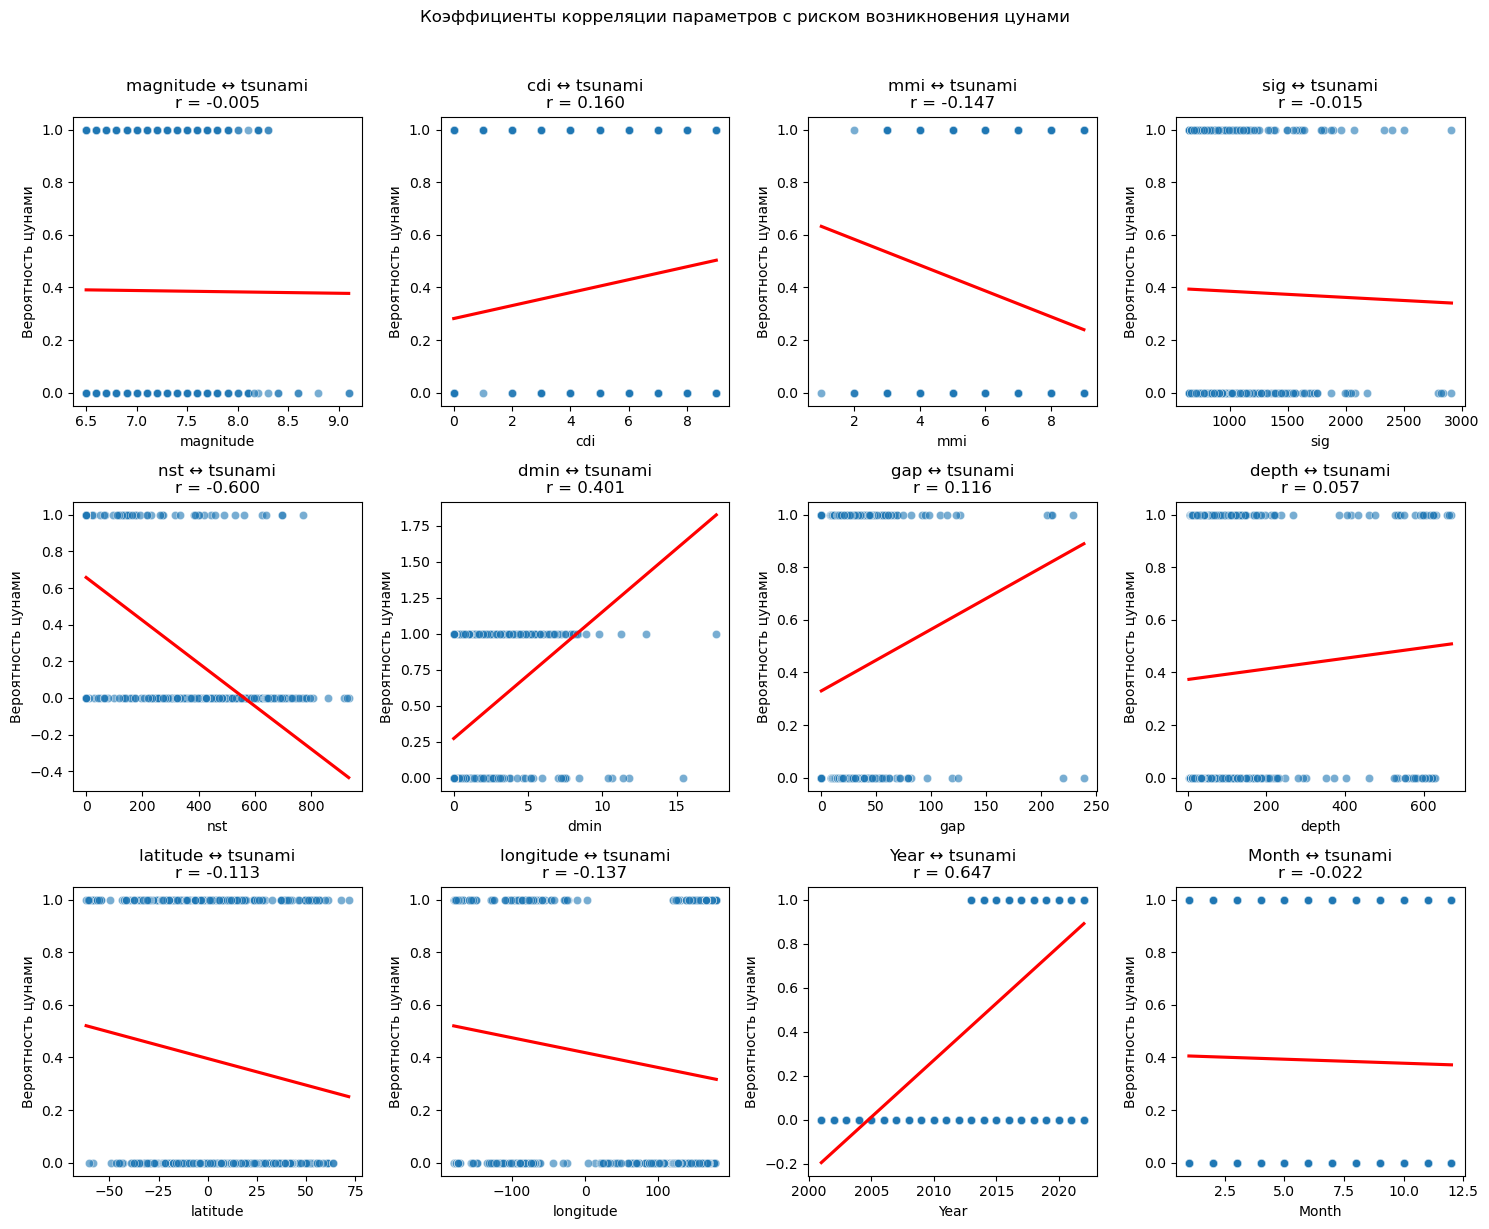


КОЭФФИЦИЕНТЫ КОРРЕЛЯЦИИ С TSUNAMI:
   magnitude: -0.005 (не влияет на риск возникновения цунами)
   cdi: 0.160 (слабо влияет на риск возникновения цунами)
   mmi: -0.147 (слабо влияет на риск возникновения цунами)
   sig: -0.015 (не влияет на риск возникновения цунами)
   nst: -0.600 (↓ уменьшает риск возникновения цунами)
   dmin: 0.401 (↑ увеличивает риск возникновения цунами)
   gap: 0.116 (слабо влияет на риск возникновения цунами)
   depth: 0.057 (не влияет на риск возникновения цунами)
   latitude: -0.113 (слабо влияет на риск возникновения цунами)
   longitude: -0.137 (слабо влияет на риск возникновения цунами)
   Year: 0.647 (↑ увеличивает риск возникновения цунами)
   Month: -0.022 (не влияет на риск возникновения цунами)


In [72]:
key_features = ['magnitude', 'cdi', 'sig', 'depth', 'mmi']

sns.pairplot(df[key_features], 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Матрица рассеивания ключевых признаков', y=1.02)
plt.tight_layout()
plt.show()

tsunami_corr_features = [col for col in numeric_columns if col != 'tsunami']

num_features = len(tsunami_corr_features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.ravel() if num_rows > 1 else [axes]

for i, feature in enumerate(tsunami_corr_features):
    if feature in df.columns:
        sns.scatterplot(data=df, x=feature, y='tsunami', alpha=0.6, ax=axes[i])
        
        sns.regplot(data=df, x=feature, y='tsunami', 
                   scatter=False, ci=None, 
                   line_kws={'color': 'red'}, ax=axes[i])
        
        corr_value = df[feature].corr(df['tsunami'])
        
        axes[i].set_title(f'{feature} ↔ tsunami\nr = {corr_value:.3f}')
        axes[i].set_ylabel('Вероятность цунами')
        axes[i].set_xlabel(feature)

for i in range(len(tsunami_corr_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Коэффициенты корреляции параметров с риском возникновения цунами', y=1.02)
plt.tight_layout()
plt.show()

print("\nКОЭФФИЦИЕНТЫ КОРРЕЛЯЦИИ С TSUNAMI:")
for feature in tsunami_corr_features:
    if feature in df.columns:
        corr_value = df[feature].corr(df['tsunami'])
        if 0.1 <= abs(corr_value) < 0.3:
            influence = "слабо влияет на риск возникновения цунами"
        elif abs(corr_value) < 0.1:
            influence = "не влияет на риск возникновения цунами"
        else:
            influence = "↑ увеличивает риск возникновения цунами" if corr_value > 0 else "↓ уменьшает риск возникновения цунами"
        print(f"   {feature}: {corr_value:.3f} ({influence})")

## Сводка по корреляциям

In [76]:
print("\n" + "=" * 25)
print("СВОДКА ПО КОРРЕЛЯЦИЯМ")
print("=" * 25)

print(f"Всего сильных корреляций: {len(strong_correlations)}")
print(f"Всего средних корреляций: {len(medium_correlations)}")
print(f"Всего умеренных корреляций: {len(moderate_correlations)}")
print(f"Всего слабых корреляций: {len(weak_correlations)}")
print(f"Всего параметров, не имеющих корреляции: {len(null_correlations)}")


СВОДКА ПО КОРРЕЛЯЦИЯМ
Всего сильных корреляций: 0
Всего средних корреляций: 7
Всего умеренных корреляций: 6
Всего слабых корреляций: 30
Всего параметров, не имеющих корреляции: 35


## Вывод

В ходе анализа данных о землетрясениях выявлены значимые корреляции между сейсмическими параметрами и риском возникновения цунами. Датасет демонстрирует высокое качество - отсутствуют пропущенные значения, что обеспечивает надежность анализа.

Обнаружена сильная взаимосвязь между временными параметрами: год регистрации показывает значительную положительную корреляцию с риском цунами (0.647), а количество сейсмостанций - отрицательную (-0.600). 

На риск цунами наиболее существенно влияют временные и географические факторы, в то время как базовые параметры землетрясения (магнитуда, глубина очага) демонстрируют слабую связь с целевой переменной. Статистический анализ выявил наличие выбросов в технических параметрах мониторинга, что характерно для сейсмологических данных.

Корреляционная матрица подтвердила наличие как сильно связанных параметров (nst-Year, nst-tsunami), так и независимых характеристик. Полученные результаты позволяют переходить к этапу построения прогнозных моделей с акцентом на временные и географические предикторы.